<a href="https://colab.research.google.com/github/arudhatt/sentiment_analysis/blob/main/qatar_airways_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis - Customer Reviews Qatar Airways

The "Qatar Airways Review Dataset" comprises a compilation of feedback, evaluations, and ratings pertaining to Qatar Airways, a prominent airline headquartered in Doha, Qatar. This dataset encompasses diverse forms of information, including:

* Customer Reviews: Textual assessments submitted by passengers following their experiences with Qatar Airways. These reviews encompass various facets such as flight experiences, customer service quality, in-flight amenities, seating comfort, and overall satisfaction levels.

* Ratings: Numerical evaluations or scores assigned by passengers across different dimensions of their flight encounters, encompassing overall satisfaction levels, food quality, cleanliness standards, punctuality, and other pertinent criteria.

* Demographic Information: Data pertaining to reviewers, including demographic attributes such as age, gender, nationality, frequent flyer status, and travel preferences.

* Flight Details: Specifics regarding the flights or routes undertaken by reviewers, encompassing departure and arrival destinations, flight durations, aircraft types, and travel classes (economy, business, first class, etc.).

**Sentiment Analysis:** Analysis of the expressed sentiment within reviews, categorized into positive, negative, or neutral sentiments.

The Qatar Airways Review Dataset serves various purposes, including:

Facilitating analysis of customer feedback to identify areas necessitating enhancement and to optimize the overall passenger experience.
Conducting sentiment analysis to gauge public sentiment and perceptions towards Qatar Airways.
Comparing Qatar Airways' performance against that of other airlines within the industry.
Training machine learning models for tasks such as sentiment classification, opinion mining, or summarization of customer reviews.
This dataset is valuable for researchers, data analysts, airline industry professionals, and machine learning enthusiasts seeking to conduct analyses, derive insights, and develop predictive models relating to customer satisfaction and airline performance.

### Load and clean the data

In [3]:
import pandas as pd

# Load the dataset
data_path = 'qatar_airways_reviews.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
0,0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,2024-03-02,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0
1,1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,2024-02-29,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0
2,2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2024-02-29,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0
3,3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,2024-02-25,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,Doha to London Heathrow,February 2024,NaN,A380-800,1.0
4,4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2024-02-22,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0


In [4]:
import pandas as pd
import numpy as np

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Assuming df is your DataFrame
for col in df.columns:
    if df[col].dtype == np.number:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())


Missing values in each column:
 Unnamed: 0              0
Date Published          0
Rating                  1
Max Rating              1
Title                   0
Author                  0
Country                 0
Date                    0
Review Body             0
Type Of Traveller     435
Seat Type               0
Route                 438
Date Flown            444
Recommended          1781
Aircraft             1088
Verified             1117
dtype: int64

Missing values after handling:
 Unnamed: 0           0
Date Published       0
Rating               0
Max Rating           0
Title                0
Author               0
Country              0
Date                 0
Review Body          0
Type Of Traveller    0
Seat Type            0
Route                0
Date Flown           0
Recommended          0
Aircraft             0
Verified             0
dtype: int64


<ipython-input-4-c30fbb3a2638>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number:


In [5]:
import numpy as np

# Summarize key statistics for numerical variables
numerical_stats = df.select_dtypes(include=[np.number]).describe()
print("Numerical statistics:\n", numerical_stats)

# Summarize key statistics for categorical variables
categorical_stats = df.select_dtypes(include=['object']).describe()
print("\nCategorical statistics:\n", categorical_stats)

Numerical statistics:
         Unnamed: 0       Rating  Max Rating     Verified
count  2369.000000  2369.000000      2369.0  2369.000000
mean   1184.000000     7.311233        10.0     0.920128
std     684.015716     2.860762         0.0     0.197121
min       0.000000     1.000000        10.0     0.000000
25%     592.000000     5.000000        10.0     0.920128
50%    1184.000000     8.000000        10.0     0.920128
75%    1776.000000    10.000000        10.0     1.000000
max    2368.000000    10.000000        10.0     1.000000

Categorical statistics:
        Date Published                          Title           Author  \
count            2369                           2369             2369   
unique           1578                           1784             1980   
top        2015-01-19  Qatar Airways customer review  Anders Pedersen   
freq               10                            532               51   

               Country        Date  \
count             2369        2369

In [6]:
# Distribution of ratings
rating_distribution = df['Rating'].value_counts(normalize=True) * 100
print("\nDistribution of Ratings (%):\n", rating_distribution)


Distribution of Ratings (%):
 Rating
10.000000    30.645842
9.000000     17.391304
8.000000     11.777121
7.000000      8.948924
5.000000      6.500633
1.000000      6.416209
6.000000      5.656395
3.000000      4.601098
4.000000      4.136767
2.000000      3.883495
7.311233      0.042212
Name: proportion, dtype: float64


In [7]:
# Number of reviews per country
reviews_per_country = df['Country'].value_counts()
print("\nNumber of reviews per country:\n", reviews_per_country)


Number of reviews per country:
 Country
United Kingdom    489
United States     271
Australia         243
Germany           117
Qatar              91
                 ... 
Slovenia            1
Morocco             1
Bermuda             1
Algeria             1
Seychelles          1
Name: count, Length: 94, dtype: int64


### Sentiment Analysi

In [8]:
from textblob import TextBlob

# Function to classify sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
df['Sentiment'] = df['Review Body'].apply(classify_sentiment)

# Display the distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts(normalize=True) * 100
print("Distribution of Sentiments (%):\n", sentiment_distribution)

Distribution of Sentiments (%):
 Sentiment
Positive    86.956522
Negative    12.199240
Neutral      0.844238
Name: proportion, dtype: float64


In [9]:
# Analyze sentiment by Rating
sentiment_by_rating = df.groupby('Rating')['Sentiment'].value_counts(normalize=True) * 100
print("\nSentiment distribution by Rating:\n", sentiment_by_rating)



Sentiment distribution by Rating:
 Rating     Sentiment
1.000000   Negative      48.026316
           Positive      46.710526
           Neutral        5.263158
2.000000   Positive      47.826087
           Negative      47.826087
           Neutral        4.347826
3.000000   Positive      54.128440
           Negative      45.871560
4.000000   Positive      62.244898
           Negative      36.734694
           Neutral        1.020408
5.000000   Positive      78.571429
           Negative      20.129870
           Neutral        1.298701
6.000000   Positive      85.074627
           Negative      14.179104
           Neutral        0.746269
7.000000   Positive      92.452830
           Negative       6.603774
           Neutral        0.943396
7.311233   Positive     100.000000
8.000000   Positive      96.057348
           Negative       3.584229
           Neutral        0.358423
9.000000   Positive      98.543689
           Negative       1.213592
           Neutral        0.24271

In [10]:
# Analyze sentiment by Type Of Traveller
sentiment_by_traveller_type = df.groupby('Type Of Traveller')['Sentiment'].value_counts(normalize=True) * 100
print("\nSentiment distribution by Type Of Traveller:\n", sentiment_by_traveller_type)


Sentiment distribution by Type Of Traveller:
 Type Of Traveller  Sentiment
Business           Positive     82.461538
                   Negative     16.615385
                   Neutral       0.923077
Couple Leisure     Positive     86.462882
                   Negative     12.663755
                   Neutral       0.873362
Family Leisure     Positive     85.760518
                   Negative     13.268608
                   Neutral       0.970874
Solo Leisure       Positive     88.566954
                   Negative     10.649961
                   Neutral       0.783085
Name: proportion, dtype: float64


In [11]:
# Analyze sentiment by Seat Type
sentiment_by_seat_type = df.groupby('Seat Type')['Sentiment'].value_counts(normalize=True) * 100
print("\nSentiment distribution by Seat Type:\n", sentiment_by_seat_type)


Sentiment distribution by Seat Type:
 Seat Type        Sentiment
Business Class   Positive     90.681818
                 Negative      8.750000
                 Neutral       0.568182
Economy Class    Positive     84.535368
                 Negative     14.424411
                 Neutral       1.040222
First Class      Positive     92.307692
                 Negative      7.692308
Premium Economy  Positive     87.500000
                 Negative     12.500000
Name: proportion, dtype: float64


### Visualize sentiment analysis results
Identify key drivers of positive and negative experiences by analyzing the relationship with other variables
I will look at the relationship between sentiment and 'Type Of Traveller', 'Seat Type', and 'Route'

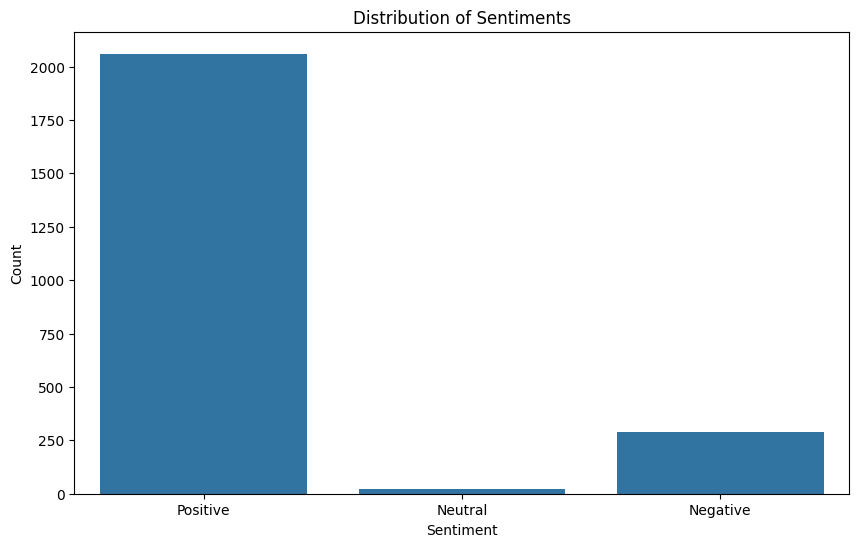

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

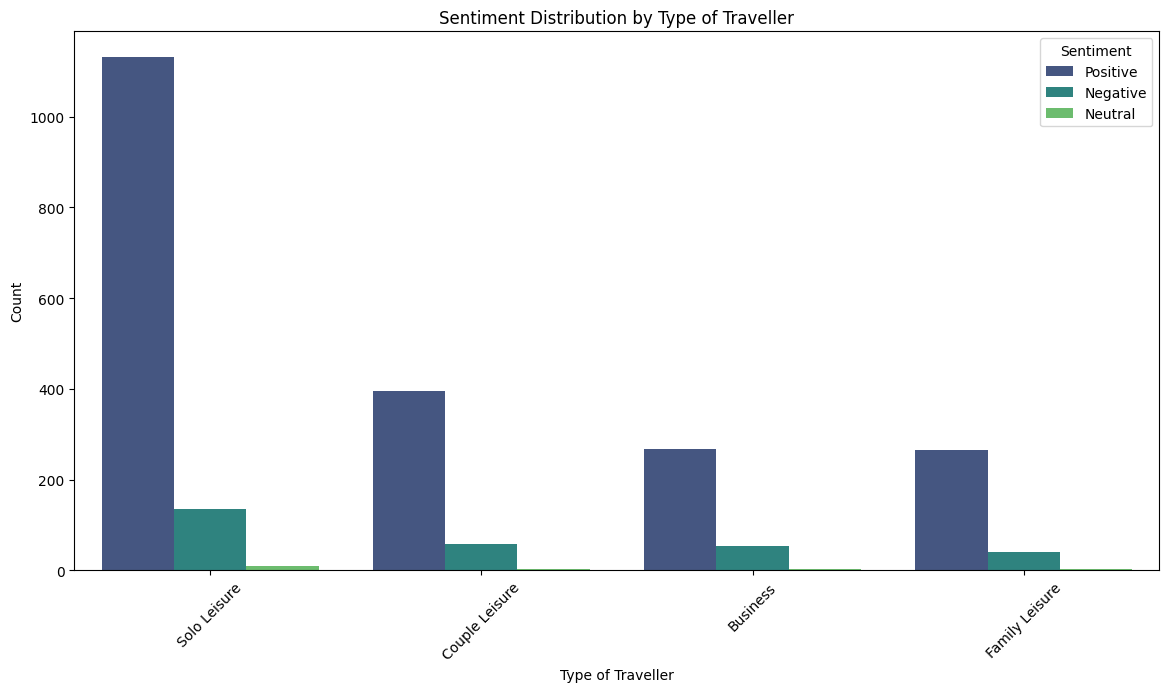

In [13]:
# Sentiment by Type of Traveller
plt.figure(figsize=(14, 7))
sns.countplot(x='Type Of Traveller', hue='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

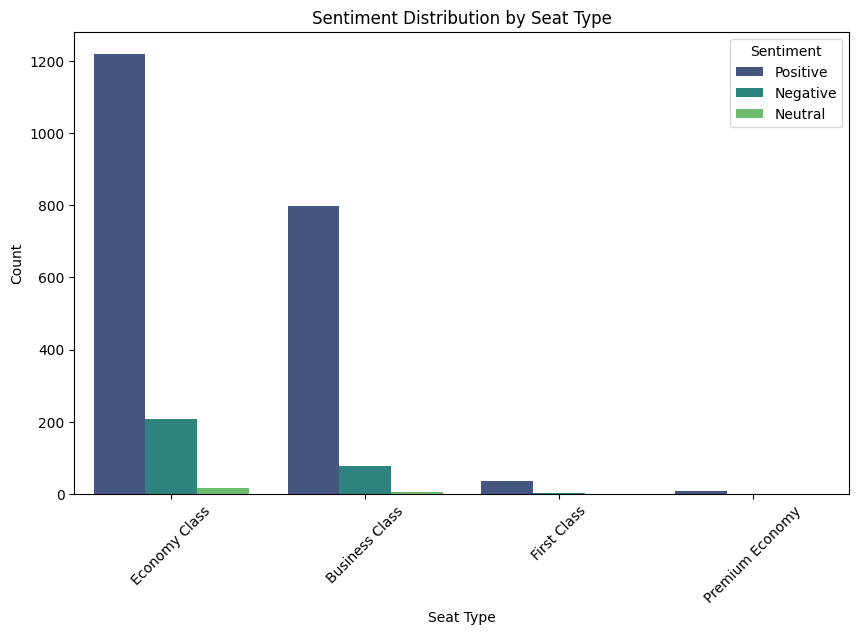

In [14]:
# Sentiment by Seat Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Seat Type', hue='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

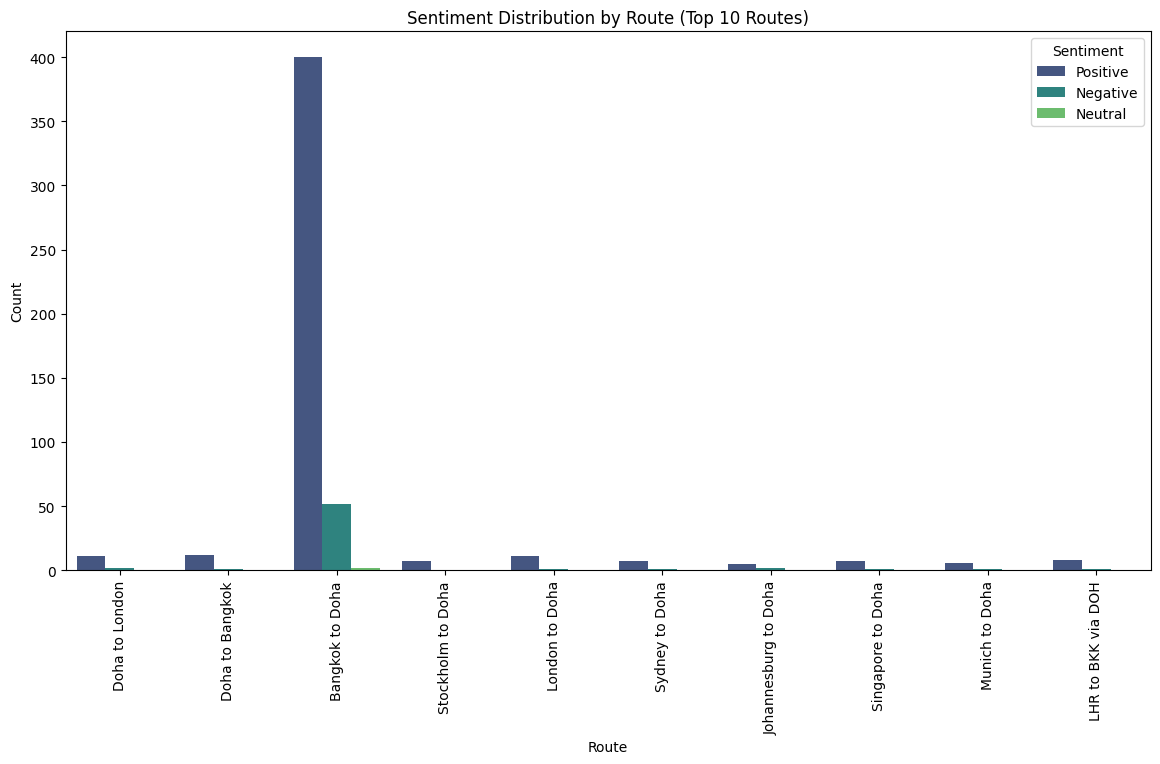

In [15]:
# Sentiment by Route (Top 10 most reviewed routes)
top_routes = df['Route'].value_counts().nlargest(10).index
filtered_data = df[df['Route'].isin(top_routes)]
plt.figure(figsize=(14, 7))
sns.countplot(x='Route', hue='Sentiment', data=filtered_data, palette='viridis')
plt.title('Sentiment Distribution by Route (Top 10 Routes)')
plt.xlabel('Route')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

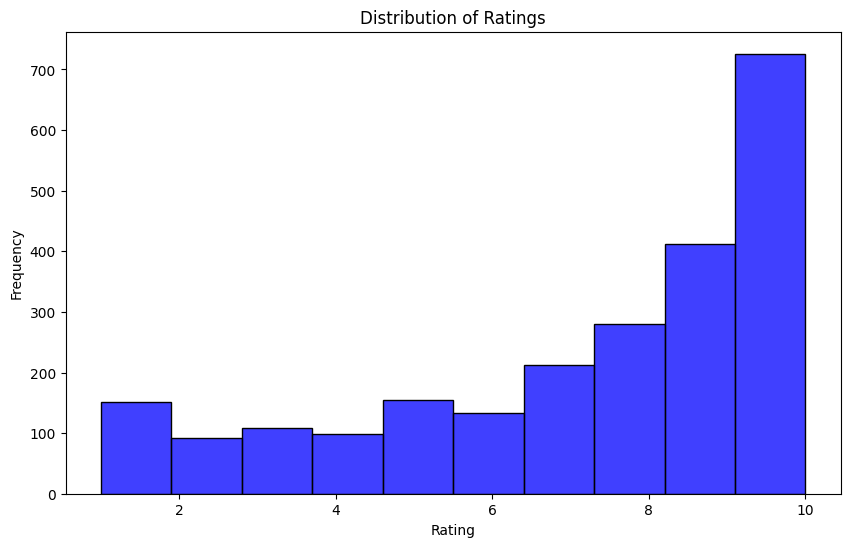

In [16]:
# Analyzing the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=False, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

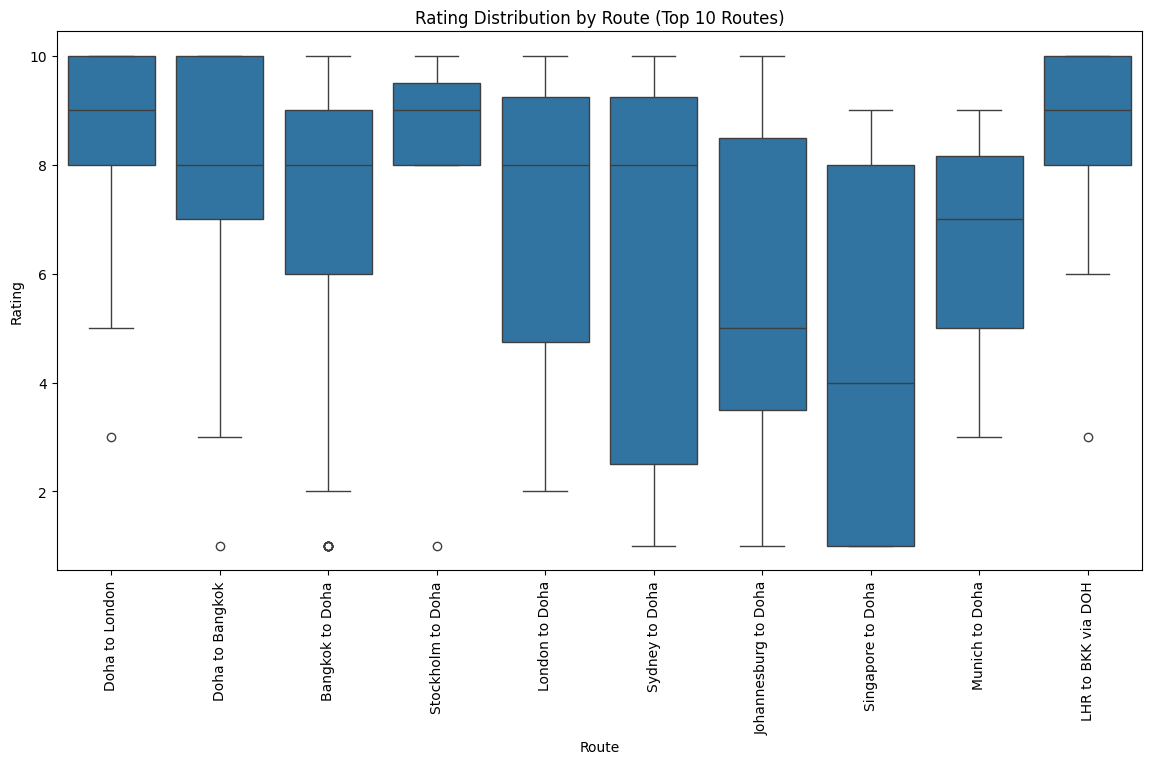

In [17]:
# Exploring the relationship between ratings and the 'Route'
plt.figure(figsize=(14, 7))
top_routes = df['Route'].value_counts().nlargest(10).index
filtered_data = df[df['Route'].isin(top_routes)]
sns.boxplot(x='Route', y='Rating', data=filtered_data)
plt.title('Rating Distribution by Route (Top 10 Routes)')
plt.xlabel('Route')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

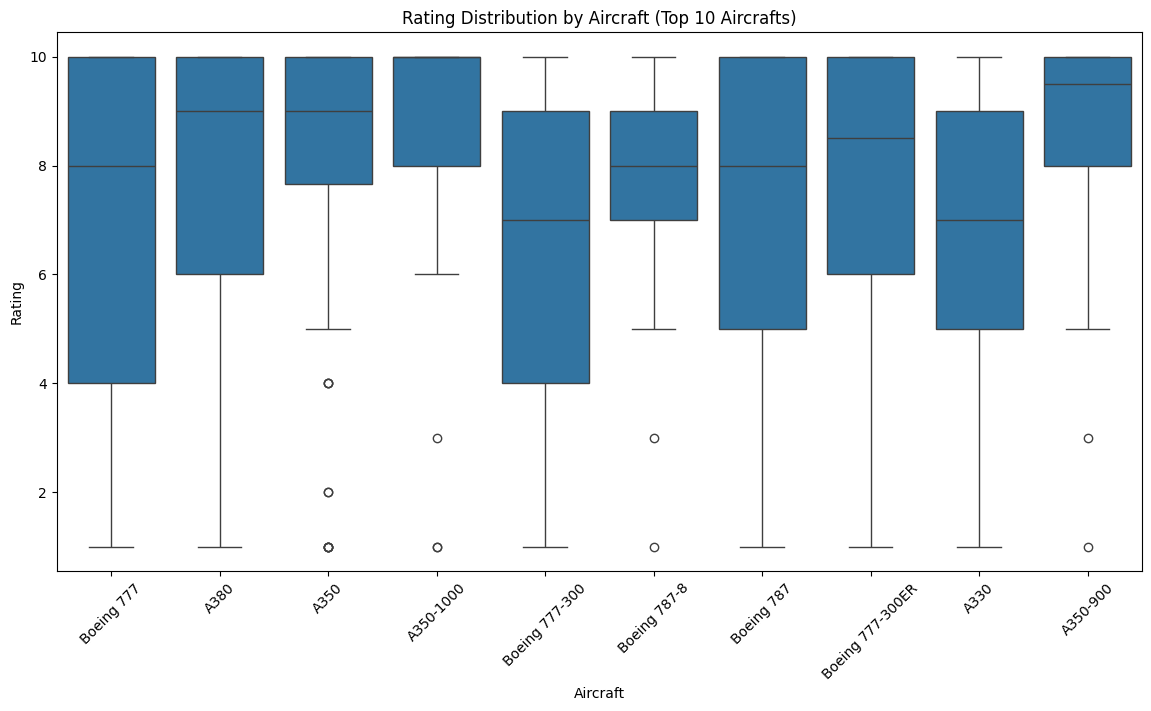

In [18]:
# Exploring the relationship between ratings and the 'Aircraft'
plt.figure(figsize=(14, 7))
top_aircrafts = df['Aircraft'].value_counts().nlargest(10).index
filtered_data = df[df['Aircraft'].isin(top_aircrafts)]
sns.boxplot(x='Aircraft', y='Rating', data=filtered_data)
plt.title('Rating Distribution by Aircraft (Top 10 Aircrafts)')
plt.xlabel('Aircraft')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

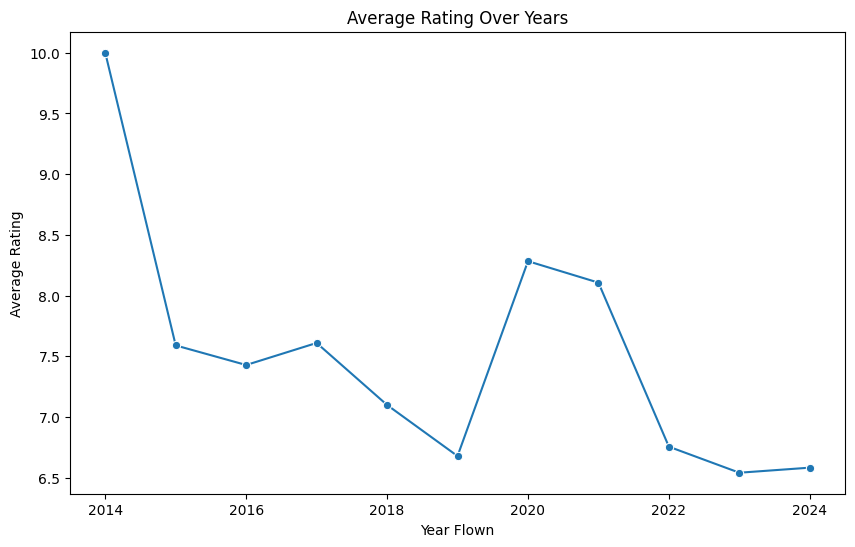

In [20]:
# Investigating temporal trends in ratings
df['Date Flown'] = pd.to_datetime(df['Date Flown'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
df['Year Flown'] = df['Date Flown'].dt.year
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year Flown', y='Rating', estimator=np.mean, errorbar=None, marker='o')
plt.title('Average Rating Over Years')
plt.xlabel('Year Flown')
plt.ylabel('Average Rating')
plt.show()

### Analyze keywords from the reviews
Analyze frequently discussed keywords and their relationship to sentiment and ratings.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Extracting features from the text data
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(df['Review Body'])

# Fitting LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tf)

# Displaying the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, no_top_words)


Topic 0:
flight doha qatar good airways food staff service crew time
Topic 1:
flight doha qatar airport hours check told staff time airways
Topic 2:
flight doh seat doha good seats food service cabin time
Topic 3:
qatar airways doha service flight class business crew staff experience
Topic 4:
doha class business good service food lounge qatar flights flight


In [22]:
# Extract the topic probabilities for each document in the dataset
topic_probabilities = lda.transform(tf)

# Create a DataFrame for these topic probabilities
topic_df = pd.DataFrame(topic_probabilities, columns=[f"Topic {i}" for i in range(lda.n_components)])

# Concatenate the original DataFrame with the new topic DataFrame
df_topics = pd.concat([df, topic_df], axis=1)

# Analyze the relationship between topics and sentiment
topic_sentiment_means = df_topics.groupby('Sentiment')[[f"Topic {i}" for i in range(lda.n_components)]].mean()
print("Average topic distribution across sentiments:\n", topic_sentiment_means)

# Analyze the relationship between topics and ratings
topic_rating_means = df_topics.groupby(pd.cut(df_topics["Rating"], bins=np.arange(0, 11, 1)))[[f"Topic {i}" for i in range(lda.n_components)]].mean()
print("\nAverage topic distribution across rating bins:\n", topic_rating_means)

Average topic distribution across sentiments:
             Topic 0   Topic 1   Topic 2   Topic 3   Topic 4
Sentiment                                                  
Negative   0.129248  0.383401  0.258964  0.102365  0.126023
Neutral    0.082816  0.553794  0.174545  0.098227  0.090619
Positive   0.241983  0.123057  0.216488  0.206403  0.212069

Average topic distribution across rating bins:
           Topic 0   Topic 1   Topic 2   Topic 3   Topic 4
Rating                                                   
(0, 1]   0.081514  0.688873  0.097663  0.091030  0.040920
(1, 2]   0.115875  0.411661  0.231195  0.142968  0.098300
(2, 3]   0.150744  0.336657  0.301536  0.121514  0.089548
(3, 4]   0.147968  0.250475  0.300395  0.128240  0.172921
(4, 5]   0.159285  0.214618  0.359133  0.092197  0.174767
(5, 6]   0.170283  0.127266  0.370169  0.103412  0.228870
(6, 7]   0.205934  0.117791  0.371105  0.110665  0.194505
(7, 8]   0.232875  0.094145  0.291860  0.119816  0.261304
(8, 9]   0.262567  0.063

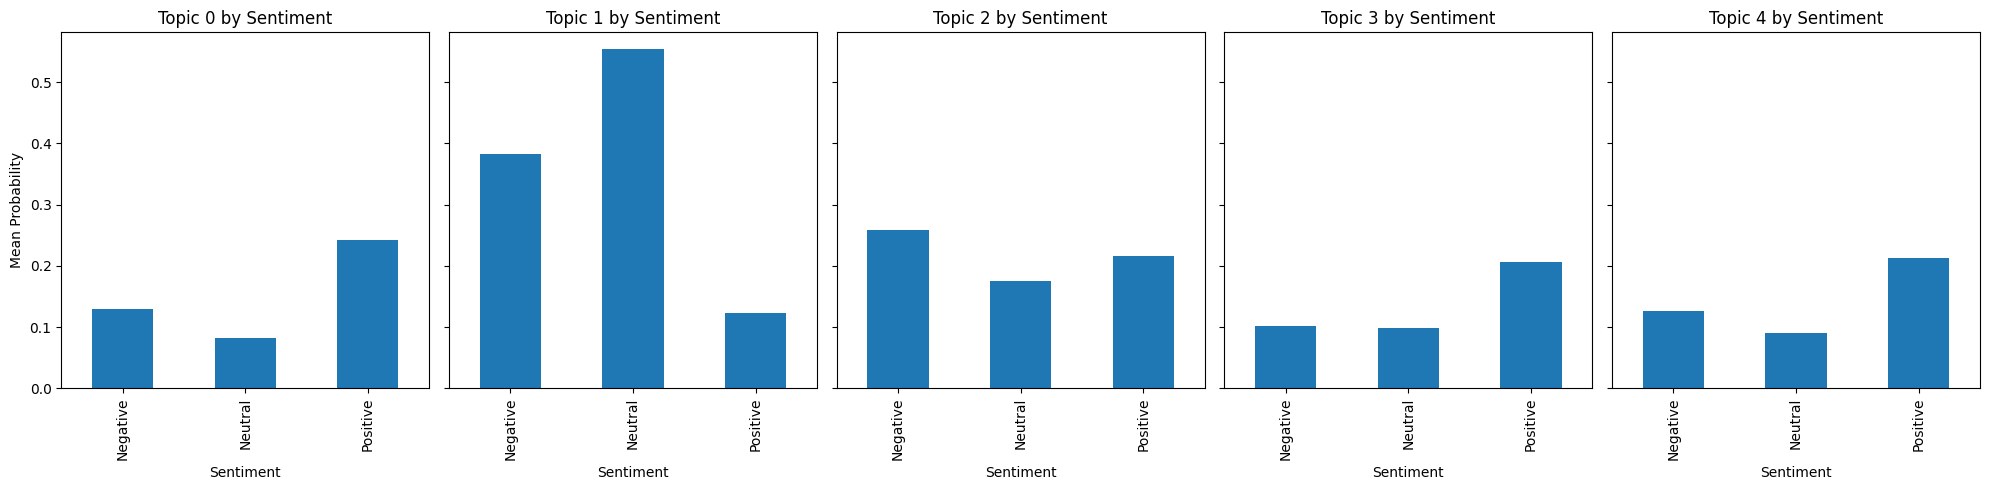

In [23]:
# Visualize the relationship between topics and sentiment
fig, axes = plt.subplots(nrows=1, ncols=lda.n_components, figsize=(20, 5), sharey=True)
for i, ax in enumerate(axes):
    topic_sentiment_means[f"Topic {i}"].plot(kind='bar', ax=ax, title=f"Topic {i} by Sentiment")
    ax.set_ylabel("Mean Probability")
plt.tight_layout()
plt.show()

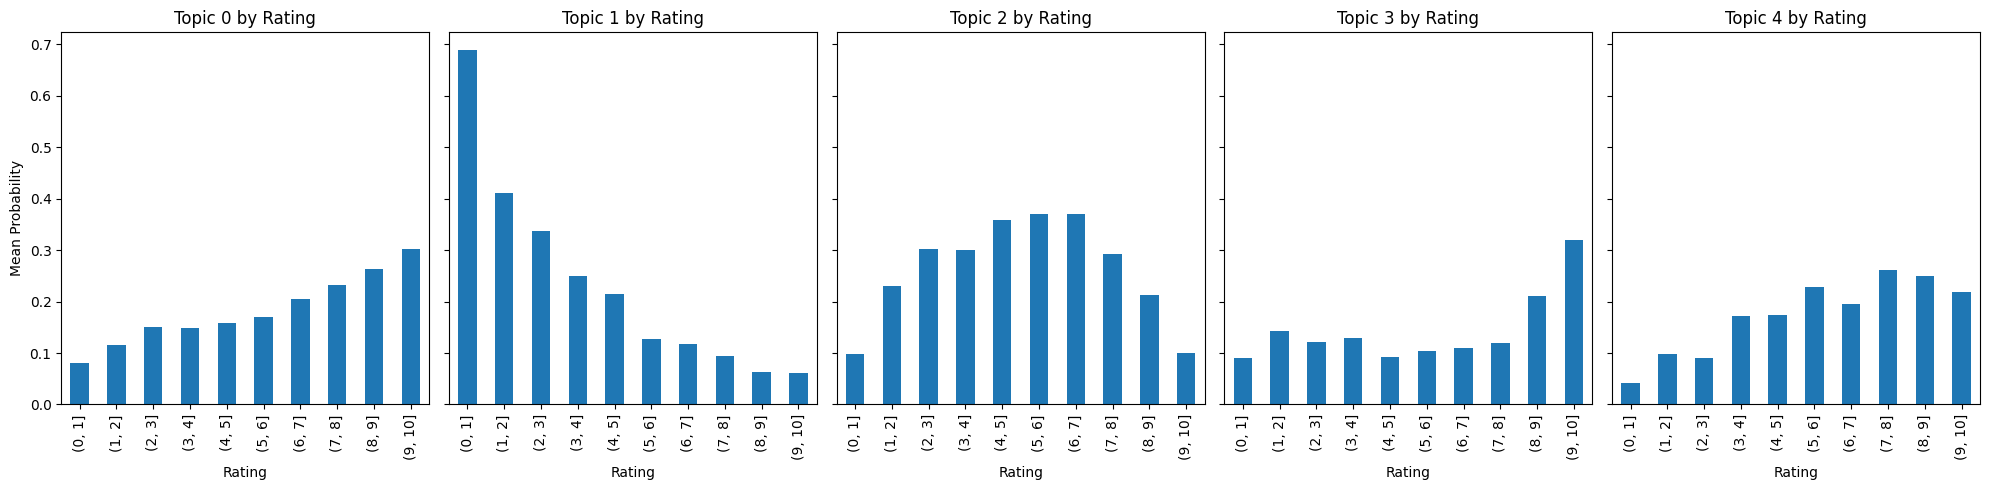

In [24]:
# Visualize the relationship between topics and ratings
fig, axes = plt.subplots(nrows=1, ncols=lda.n_components, figsize=(20, 5), sharey=True)
for i, ax in enumerate(axes):
    topic_rating_means[f"Topic {i}"].plot(kind='bar', ax=ax, title=f"Topic {i} by Rating")
    ax.set_ylabel("Mean Probability")
plt.tight_layout()
plt.show()

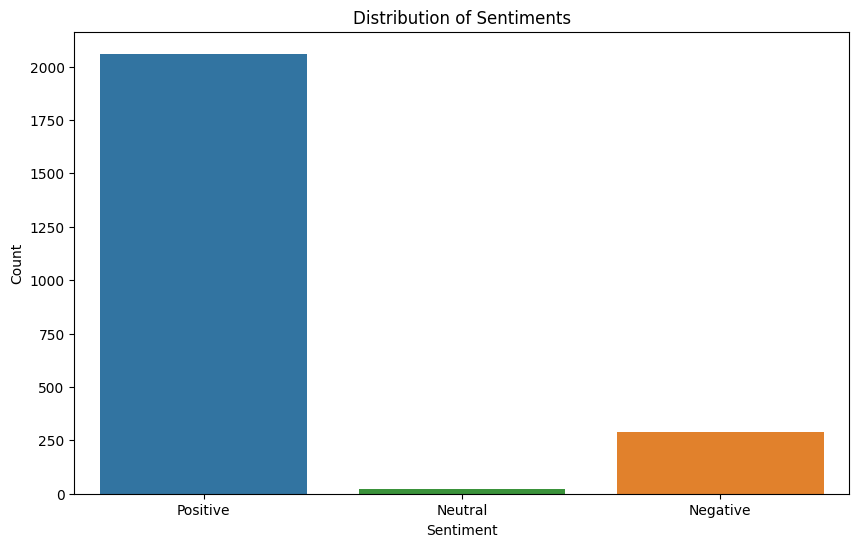

In [30]:
# Visualization of Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'], hue='Sentiment', legend=False)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

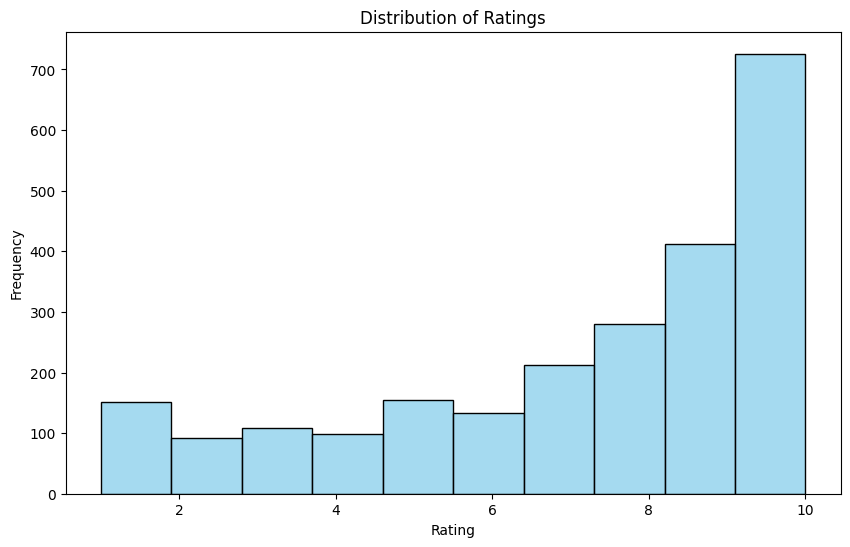

In [26]:
# Visualization of Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

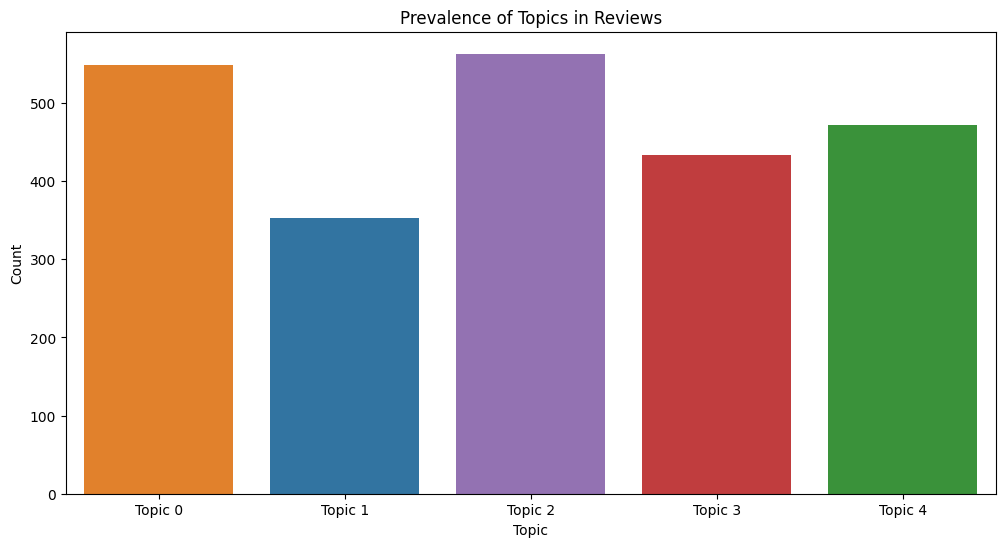

In [29]:
# Visualization of Topic Prevalence
topic_columns = [f"Topic {i}" for i in range(lda.n_components)]
df_topics['Dominant Topic'] = df_topics[topic_columns].idxmax(axis=1)

plt.figure(figsize=(12, 6))
sns.countplot(x='Dominant Topic', data=df_topics, order=topic_columns, hue='Dominant Topic', legend=False)
plt.title('Prevalence of Topics in Reviews')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

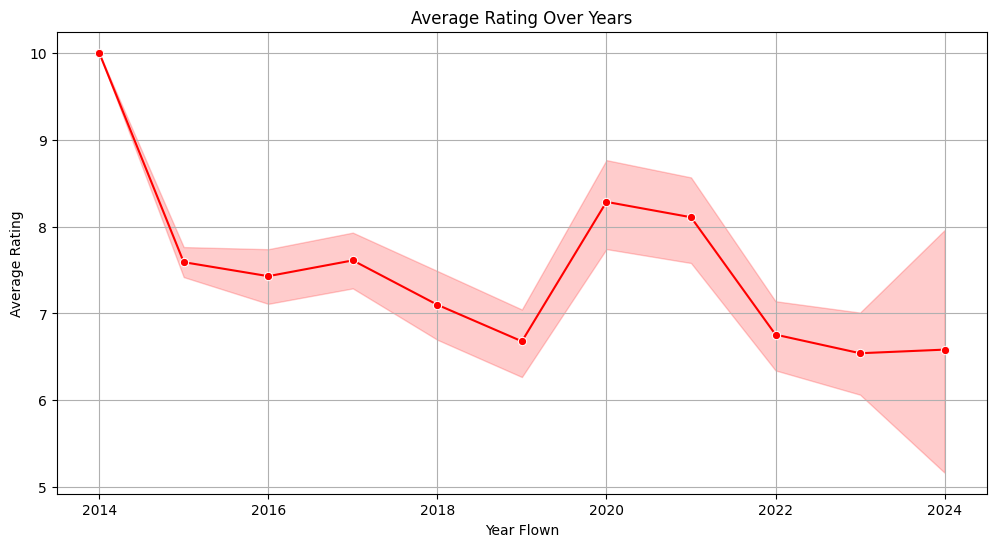

In [28]:
# Visualization of Average Rating Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year Flown', y='Rating', estimator=np.mean, marker='o', color='red')
plt.title('Average Rating Over Years')
plt.xlabel('Year Flown')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()